In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
E = big5_sc.loc[:, "E1":"E10"]

In [5]:
E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_16448\3466361353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]


In [6]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score
0,4,4,5,4,5,5,4,3,5,5,44
1,2,4,3,3,3,3,1,1,1,1,22
2,5,5,1,2,5,5,1,1,5,5,35
3,2,1,2,2,3,2,3,2,4,1,22
4,3,5,3,3,3,5,3,5,3,1,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21
19715,2,3,2,3,2,3,2,2,4,2,25
19716,2,1,4,1,5,1,1,4,1,1,21
19717,1,2,2,3,2,2,1,3,4,1,21


In [7]:
categorys = []
for val in E['score']:
    if val < 25:
        category = 0
    elif val > 35 :
        category = 2
    else:
        category = 1
    categorys.append(category)
    
E['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_16448\3582124944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['C'] = categorys


In [8]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,2
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21,0
19715,2,3,2,3,2,3,2,2,4,2,25,1
19716,2,1,4,1,5,1,1,4,1,1,21,0
19717,1,2,2,3,2,2,1,3,4,1,21,0


In [65]:
C_train_X, C_train_y = E.iloc[:int(len(E.index)*0.8), :-2], E.iloc[:int(len(E.index)*0.8), -1]
C_test_X, C_test_y = E.iloc[int(len(E.index)*0.8):, :-2], E.iloc[int(len(E.index)*0.8):, -1]
C_test_X = C_test_X.reset_index(drop=True)

In [70]:
C_classifier = RandomForestClassifier(n_estimators = 10)
C_classifier.fit(C_train_X, C_train_y)

C_score = C_classifier.score(C_test_X, C_test_y)
print(C_score)

C_train_score = C_classifier.score(C_train_X, C_train_y)
print(C_train_score)

0.934077079107505
0.9974009508716323


In [67]:
C_y_pred = C_classifier.predict(C_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_test_y), (C_test_y != C_y_pred).sum()))
print('정확도 : %.2f' %((len(C_test_y) - (C_test_y != C_y_pred).sum()) / len(C_test_y)))

총 테스트 개수 : 3944, 오류개수 : 265
정확도 : 0.93


In [68]:
C_train_y_pred = C_classifier.predict(C_train_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_train_y), (C_train_y != C_train_y_pred).sum()))
print('정확도 : %.2f' %((len(C_train_y) - (C_train_y != C_train_y_pred).sum()) / len(C_train_y)))

총 테스트 개수 : 15775, 오류개수 : 44
정확도 : 1.00


feature ranking:
1. feature E4 (0.145)
2. feature E7 (0.140)
3. feature E2 (0.126)
4. feature E5 (0.115)
5. feature E9 (0.089)
6. feature E3 (0.089)
7. feature E1 (0.088)
8. feature E8 (0.074)
9. feature E10 (0.072)
10. feature E6 (0.062)


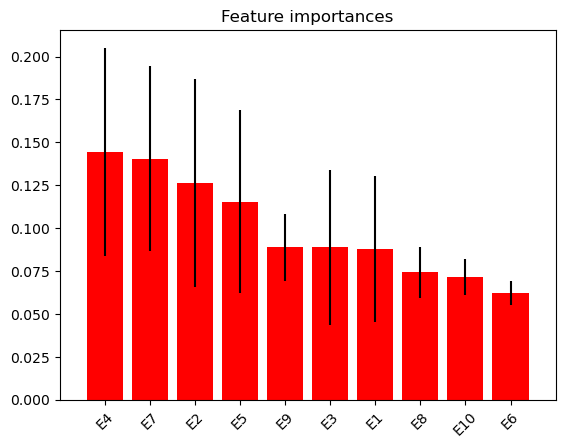

In [71]:
importances = C_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in C_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(C_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, C_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(C_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(C_train_X.columns)), C_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(C_train_X.columns)])
plt.show()

In [72]:
random.seed(0)

In [73]:
E7_trans_C_train_X = C_train_X.copy()
random.shuffle(E7_trans_C_train_X.loc[:,"E7"])

E7_trans_C_score =C_classifier.score(E7_trans_C_train_X, C_train_y)
print(E7_trans_C_score)

0.8909033280507132


In [74]:
E5_trans_C_train_X = C_train_X.copy()
random.shuffle(E5_trans_C_train_X.loc[:,"E5"])

E5_trans_C_score =C_classifier.score(E5_trans_C_train_X, C_train_y)
print(E5_trans_C_score)

0.9032646592709984


In [75]:
E4_trans_C_train_X = C_train_X.copy()
random.shuffle(E4_trans_C_train_X.loc[:,"E4"])

E4_trans_C_score =C_classifier.score(E4_trans_C_train_X, C_train_y)
print(E4_trans_C_score)

0.9163866877971474


In [76]:
E2_trans_C_train_X = C_train_X.copy()
random.shuffle(E2_trans_C_train_X.loc[:,"E2"])

E2_trans_C_score =C_classifier.score(E2_trans_C_train_X, C_train_y)
print(E2_trans_C_score)

0.9041521394611728


In [77]:
E9_trans_C_train_X = C_train_X.copy()
random.shuffle(E9_trans_C_train_X.loc[:,"E9"])

E9_trans_C_score =C_classifier.score(E9_trans_C_train_X, C_train_y)
print(E9_trans_C_score)

0.9096671949286846


In [78]:
E8_trans_C_train_X = C_train_X.copy()
random.shuffle(E8_trans_C_train_X.loc[:,"E8"])

E8_trans_C_score =C_classifier.score(E8_trans_C_train_X, C_train_y)
print(E8_trans_C_score)

0.9220919175911252


In [79]:
E10_trans_C_train_X = C_train_X.copy()
random.shuffle(E10_trans_C_train_X.loc[:,"E10"])

E10_trans_C_score =C_classifier.score(E10_trans_C_train_X, C_train_y)
print(E10_trans_C_score)

0.9291283676703646


In [80]:
E1_trans_C_train_X = C_train_X.copy()
random.shuffle(E1_trans_C_train_X.loc[:,"E1"])

E1_trans_C_score =C_classifier.score(E1_trans_C_train_X, C_train_y)
print(E1_trans_C_score)

0.9307765451664025


In [81]:
E6_trans_C_train_X = C_train_X.copy()
random.shuffle(E6_trans_C_train_X.loc[:,"E6"])

E6_trans_C_score =C_classifier.score(E6_trans_C_train_X, C_train_y)
print(E6_trans_C_score)

0.9324881141045959


In [82]:
E3_trans_C_train_X = C_train_X.copy()
random.shuffle(E3_trans_C_train_X.loc[:,"E3"])

E3_trans_C_score =C_classifier.score(E3_trans_C_train_X, C_train_y)
print(E3_trans_C_score)

0.9274167987321712


In [83]:
print("Original Classfication Accuracy : %.4f"%C_train_score)
print("1st high importance shuffled Accuracy : %.4f"%E7_trans_C_score)
print("2nd high importance shuffled Accuracy : %.4f"%E5_trans_C_score)
print("3rd high importance shuffled Accuracy : %.4f"%E4_trans_C_score)
print("4th high importance shuffled Accuracy : %.4f"%E2_trans_C_score)
print("5th high importance shuffled Accuracy : %.4f"%E9_trans_C_score)
print("6th high importance shuffled Accuracy : %.4f"%E8_trans_C_score)
print("7th high importance shuffled Accuracy : %.4f"%E10_trans_C_score)
print("8th high importance shuffled Accuracy : %.4f"%E1_trans_C_score)
print("9th high importance shuffled Accuracy : %.4f"%E6_trans_C_score)
print("10th high importance shuffled Accuracy : %.4f"%E3_trans_C_score)

Original Classfication Accuracy : 0.9974
1st high importance shuffled Accuracy : 0.8909
2nd high importance shuffled Accuracy : 0.9033
3rd high importance shuffled Accuracy : 0.9164
4th high importance shuffled Accuracy : 0.9042
5th high importance shuffled Accuracy : 0.9097
6th high importance shuffled Accuracy : 0.9221
7th high importance shuffled Accuracy : 0.9291
8th high importance shuffled Accuracy : 0.9308
9th high importance shuffled Accuracy : 0.9325
10th high importance shuffled Accuracy : 0.9274


In [84]:
E7_trans_C_test_X = C_test_X.copy()
random.shuffle(E7_trans_C_test_X.loc[:,"E7"])

E7_trans_C_test_score =C_classifier.score(E7_trans_C_test_X, C_test_y)

E5_trans_C_test_X = C_test_X.copy()
random.shuffle(E5_trans_C_test_X.loc[:,"E5"])

E5_trans_C_test_score =C_classifier.score(E5_trans_C_test_X, C_test_y)

E10_trans_C_test_X = C_test_X.copy()
random.shuffle(E10_trans_C_test_X.loc[:,"E10"])

E10_trans_C_test_score =C_classifier.score(E10_trans_C_test_X, C_test_y)

E4_trans_C_test_X = C_test_X.copy()
random.shuffle(E4_trans_C_test_X.loc[:,"E4"])

E4_trans_C_test_score =C_classifier.score(E4_trans_C_test_X, C_test_y)

E1_trans_C_test_X = C_test_X.copy()
random.shuffle(E1_trans_C_test_X.loc[:,"E1"])

E1_trans_C_test_score =C_classifier.score(E1_trans_C_test_X, C_test_y)

E2_trans_C_test_X = C_test_X.copy()
random.shuffle(E2_trans_C_test_X.loc[:,"E2"])

E2_trans_C_test_score =C_classifier.score(E2_trans_C_test_X, C_test_y)

E8_trans_C_test_X = C_test_X.copy()
random.shuffle(E8_trans_C_test_X.loc[:,"E8"])

E8_trans_C_test_score =C_classifier.score(E8_trans_C_test_X, C_test_y)

E9_trans_C_test_X = C_test_X.copy()
random.shuffle(E9_trans_C_test_X.loc[:,"E9"])

E9_trans_C_test_score =C_classifier.score(E9_trans_C_test_X, C_test_y)

E6_trans_C_test_X = C_test_X.copy()
random.shuffle(E6_trans_C_test_X.loc[:,"E6"])

E6_trans_C_test_score =C_classifier.score(E6_trans_C_test_X, C_test_y)

E3_trans_C_test_X = C_test_X.copy()
random.shuffle(E3_trans_C_test_X.loc[:,"E3"])

E3_trans_C_test_score =C_classifier.score(E3_trans_C_test_X, C_test_y)

In [85]:
print("Original Classfication Test Accuracy : %.4f"%C_score)
print("1st high importance shuffled Accuracy : %.4f"%E7_trans_C_test_score)
print("2nd high importance shuffled Accuracy : %.4f"%E5_trans_C_test_score)
print("3rd high importance shuffled Accuracy : %.4f"%E4_trans_C_test_score)
print("4th high importance shuffled Accuracy : %.4f"%E2_trans_C_test_score)
print("5th high importance shuffled Accuracy : %.4f"%E9_trans_C_test_score)
print("6th high importance shuffled Accuracy : %.4f"%E8_trans_C_test_score)
print("7th high importance shuffled Accuracy : %.4f"%E10_trans_C_test_score)
print("8th high importance shuffled Accuracy : %.4f"%E1_trans_C_test_score)
print("9th high importance shuffled Accuracy : %.4f"%E6_trans_C_test_score)
print("10th high importance shuffled Accuracy : %.4f"%E3_trans_C_test_score)

Original Classfication Test Accuracy : 0.9341
1st high importance shuffled Accuracy : 0.8509
2nd high importance shuffled Accuracy : 0.8671
3rd high importance shuffled Accuracy : 0.8735
4th high importance shuffled Accuracy : 0.8682
5th high importance shuffled Accuracy : 0.8730
6th high importance shuffled Accuracy : 0.8831
7th high importance shuffled Accuracy : 0.8803
8th high importance shuffled Accuracy : 0.8824
9th high importance shuffled Accuracy : 0.8897
10th high importance shuffled Accuracy : 0.8905


In [86]:
E_2_se_train_X = C_train_X.copy()
E_2_se_train_X = E_2_se_train_X.loc[:, ["E5", "E7"]]

E_2_se_test_X = C_test_X.copy()
E_2_se_test_X = E_2_se_test_X.loc[:, ["E5", "E7"]]
E_2_se_test_X = E_2_se_test_X.reset_index(drop=True)

E_2_se_classifier = RandomForestClassifier(n_estimators = 10)
E_2_se_classifier.fit(E_2_se_train_X, C_train_y)

E_2_se_score = E_2_se_classifier.score(E_2_se_train_X, C_train_y)
print(E_2_se_score)

E_2_se_test_score = E_2_se_classifier.score(E_2_se_test_X, C_test_y)
print(E_2_se_test_score)

0.729635499207607
0.734026369168357


In [87]:
E_3_se_train_X = C_train_X.copy()
E_3_se_train_X = E_3_se_train_X.loc[:, ["E4", "E5", "E7"]]

E_3_se_test_X = C_test_X.copy()
E_3_se_test_X = E_3_se_test_X.loc[:, ["E4", "E5", "E7"]]
E_3_se_test_X = E_3_se_test_X.reset_index(drop=True)

E_3_se_classifier = RandomForestClassifier(n_estimators = 10)
E_3_se_classifier.fit(E_3_se_train_X, C_train_y)

E_3_se_score = E_3_se_classifier.score(E_3_se_train_X, C_train_y)
print(E_3_se_score)

E_3_se_test_score = E_3_se_classifier.score(E_3_se_test_X, C_test_y)
print(E_3_se_test_score)

0.8009508716323296
0.7986815415821501


In [88]:
E_4_se_train_X = C_train_X.copy()
E_4_se_train_X = E_4_se_train_X.loc[:, ["E2", "E4", "E5", "E7"]]

E_4_se_test_X = C_test_X.copy()
E_4_se_test_X = E_4_se_test_X.loc[:, ["E2", "E4", "E5", "E7"]]
E_4_se_test_X = E_4_se_test_X.reset_index(drop=True)

E_4_se_classifier = RandomForestClassifier(n_estimators = 10)
E_4_se_classifier.fit(E_4_se_train_X, C_train_y)

E_4_se_score = E_4_se_classifier.score(E_4_se_train_X, C_train_y)
print(E_4_se_score)

E_4_se_test_score = E_4_se_classifier.score(E_4_se_test_X, C_test_y)
print(E_4_se_test_score)

0.8349286846275753
0.8204868154158215


In [89]:
E_5_se_train_X = C_train_X.copy()
E_5_se_train_X = E_5_se_train_X.loc[:, ["E2", "E4", "E5", "E7", "E9"]]

E_5_se_test_X = C_test_X.copy()
E_5_se_test_X = E_5_se_test_X.loc[:, ["E2", "E4", "E5", "E7", "E9"]]
E_5_se_test_X = E_5_se_test_X.reset_index(drop=True)

E_5_se_classifier = RandomForestClassifier(n_estimators = 10)
E_5_se_classifier.fit(E_5_se_train_X, C_train_y)

E_5_se_score = E_5_se_classifier.score(E_5_se_train_X, C_train_y)
print(E_5_se_score)

E_5_se_test_score = E_5_se_classifier.score(E_5_se_test_X, C_test_y)
print(E_5_se_test_score)

0.8912836767036451
0.8554766734279919
